In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')
<bound method NDFrame.head of          AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
...     ...    ...      ...    ...     ...
9563  16.65  49.69  1014.01  91.00  460.03
9564  13.19  39.18  1023.67  66.78  469.62
9565  31.32  74.33  1012.92  36.48  429.57
9566  24.48  69.45  1013.86  62.39  435.74
9567  21.60  62.52  1017.23  67.87  453.28

[9568 rows x 5 columns]>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: fl

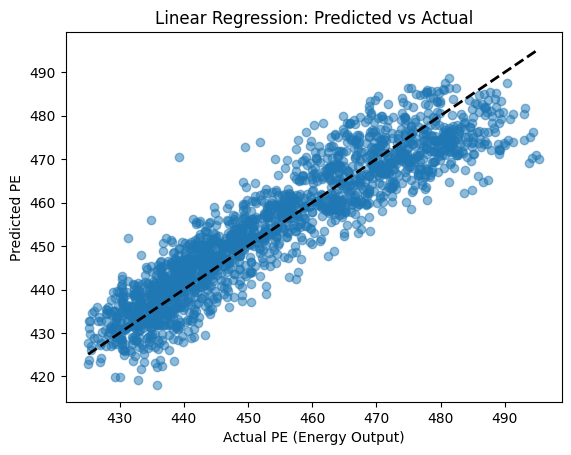

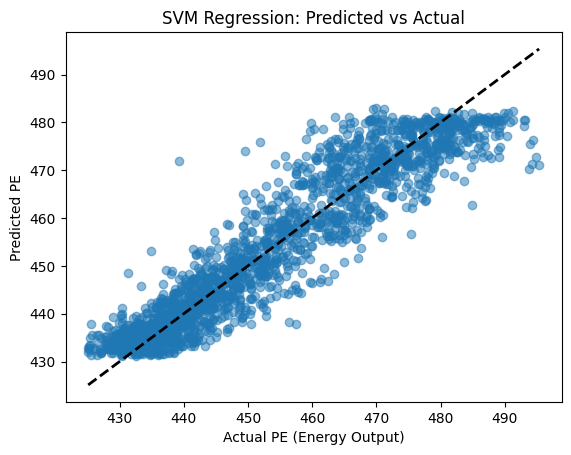

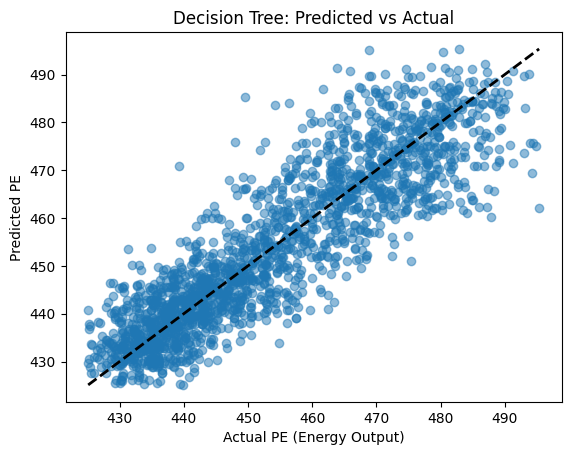

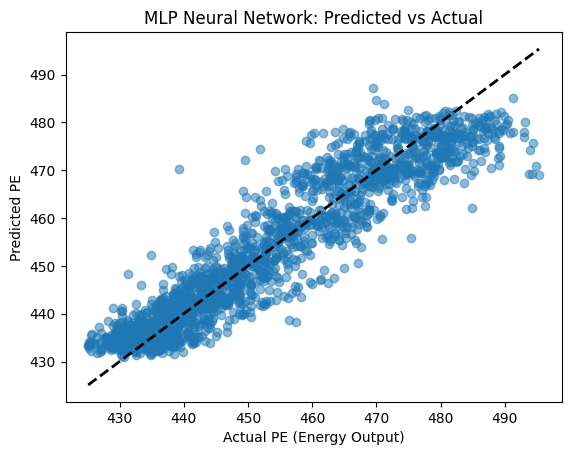

Linear Regression MSE: 45.98085352151422
SVM MSE: 37.93512222716425
Decison Tree MSE: 70.50976633256539
MLP MSE: 37.3958240947419


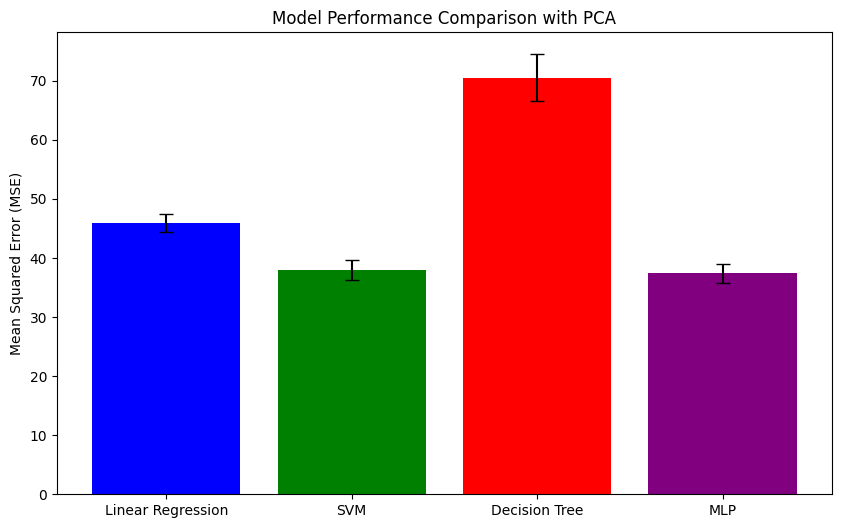

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_excel('Folds5x2_pp.xlsx')
print(data.columns)
print(data.head)
print(data.info())
print(data.describe())

# Split the data into features (X) and target variable (y)
X = data.drop('PE', axis=1)  # Features: AT, V, AP, RH
y = data['PE']  # Target: PE (Energy Output)

# Standardize the features before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)  # Adjust n_components to retain more variance
X_pca = pca.fit_transform(X_scaled)

#  Split the PCA-transformed data into training and testing sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train models and make predictions

# Helper function to train model, predict, and visualize
def train_and_visualize(model, model_name):
    # Train the model
    model.fit(X_train_pca, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test_pca)

    # Plot actual vs predicted values
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.title(f'{model_name}: Predicted vs Actual')
    plt.xlabel('Actual PE (Energy Output)')
    plt.ylabel('Predicted PE')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
    plt.show()
# Initialize the Linear Regression model
lr_model = LinearRegression()
train_and_visualize(lr_model, "Linear Regression")

# Initialize the Support Vector Regressor model
svm_model = SVR(kernel='rbf')
train_and_visualize(svm_model, "SVM Regression")

# Initialize the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
train_and_visualize(dt_model, "Decision Tree")

# Initialize the MLP model
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
train_and_visualize(mlp_model, "MLP Neural Network")

def evaluate_model(model, X_train_pca, y_train):
    cv_scores = cross_val_score(model, X_train_pca, y_train, cv=10, scoring='neg_mean_squared_error')
    mean_mse = np.mean(-cv_scores)
    std_mse = np.std(-cv_scores)
    return mean_mse, std_mse

# Evaluate and visualize performance (if needed)
lr_mse, lr_std = evaluate_model(lr_model, X_train_pca, y_train)
print(f"Linear Regression MSE: {lr_mse}")
svm_mse, svm_std = evaluate_model(svm_model, X_train_pca, y_train)
print(f"SVM MSE: {svm_mse}")
dt_mse, dt_std = evaluate_model(dt_model, X_train_pca, y_train)
print(f"Decison Tree MSE: {dt_mse}")
mlp_mse, mlp_std = evaluate_model(mlp_model, X_train_pca, y_train)
print(f"MLP MSE: {mlp_mse}")

# Plot bar chart of MSE for comparison
mse_means = [lr_mse, svm_mse, dt_mse, mlp_mse]
std_devs = [lr_std, svm_std, dt_std, mlp_std]
model_names = ['Linear Regression', 'SVM', 'Decision Tree', 'MLP']

plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_means, yerr=std_devs, capsize=5, color=['blue', 'green', 'red', 'purple'])
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Model Performance Comparison with PCA')
plt.show()